# Exercise Sheet 1: Clustering

In [1]:
# All imports
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles


from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics.pairwise import euclidean_distances

# Ignore deprecation warnings from sklearn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.utils.deprecation")

### Exercise 1-1: Simple generation and visualization of data

* Create some data using python and sklearn, e.g., with `make_blobs`
* Visualize any two dimensions of the data in a 2d scatter plot, e.g., using `matplotlib2` or `seaborn`
* Visualize the data along its two main principal components OR using a tSNE visualization

In [2]:
# 1. Create some data using python and sklearn with 'make_blobs'
X, y = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)
print(X[:10])
print(y[:10])

[[-7.33898809 -7.72995396]
 [-7.74004056 -7.26466514]
 [-1.68665271  7.79344248]
 [ 4.42219763  3.07194654]
 [-8.91775173 -7.8881959 ]
 [ 5.49753846  1.81323115]
 [-2.3360167   9.39960351]
 [ 5.05281029  1.40944513]
 [-2.98837186  8.82862715]
 [-3.70050112  9.67083974]]
[2 2 0 1 2 1 0 1 0 0]


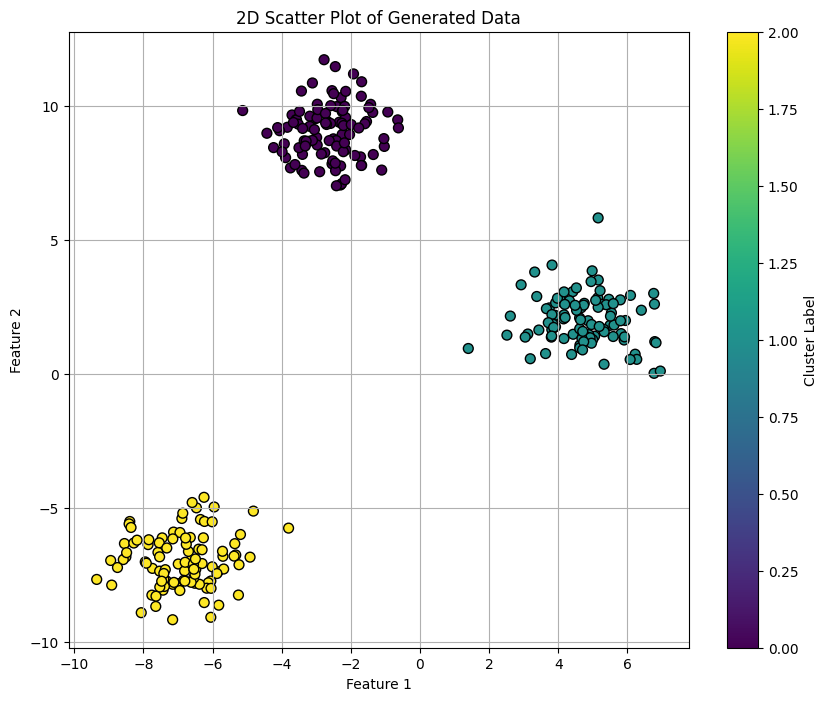

In [3]:
# 2. Visualize any two dimensions of the data in a 2d scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('2D Scatter Plot of Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

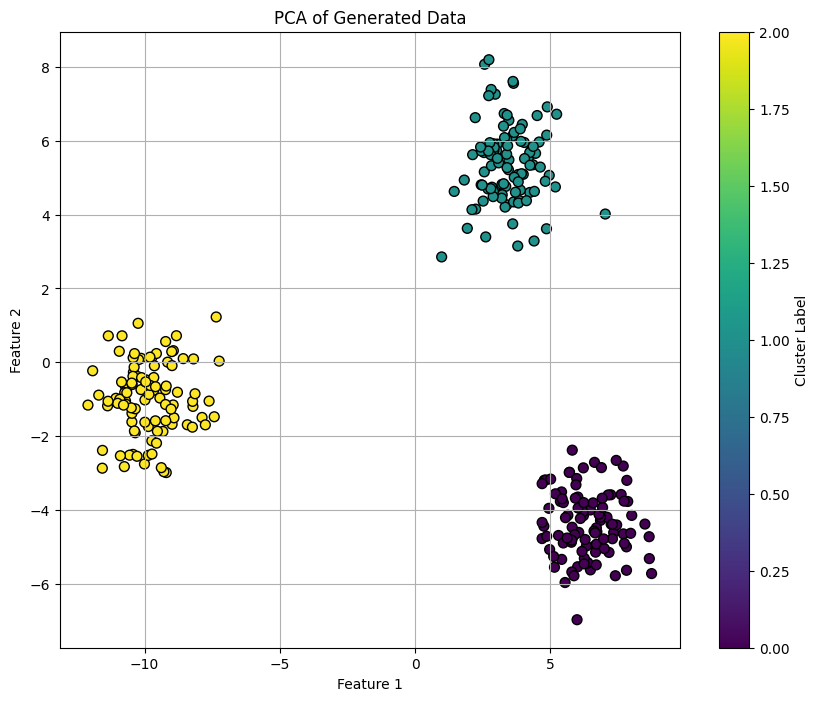

In [4]:
# 3. Visualize the data along its two main principal components (PCA)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the data
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA of Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

### Exercise 1-2: Different cluster algorithms solve different purposes

##### a) Create data that contains at least three density-based clusters that cannot be detected correctly by k-Means. Print the average **NMI** of the clusters that k-Means finds over 10 runs.

Average NMI over 10 runs: 0.300



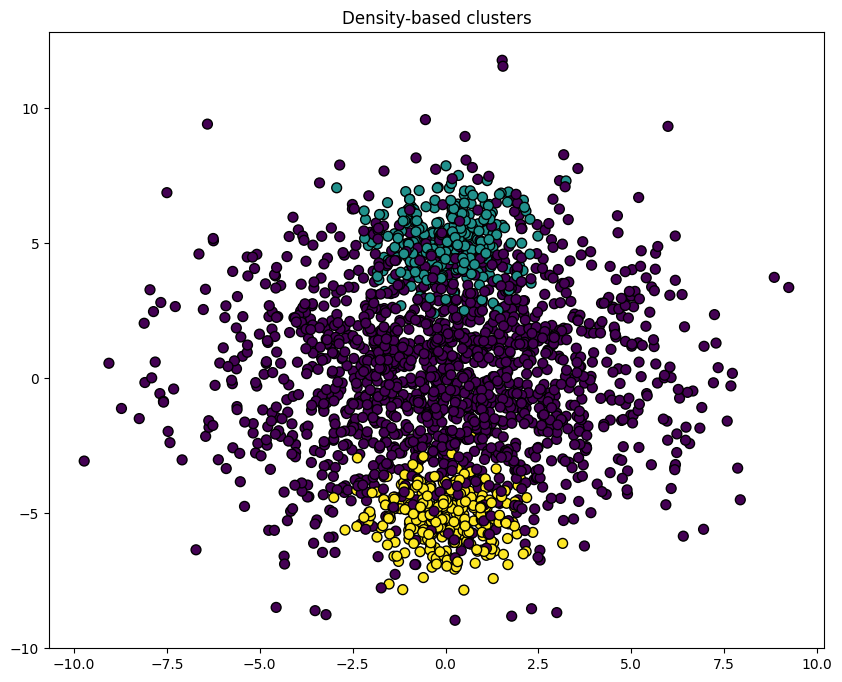

In [5]:
X_densitybased, y_densitybased = make_blobs(
    n_samples=[1600, 300, 300],
    centers=[[0, 0], [0, 5], [0, -5]],
    cluster_std=[3.0, 1.0, 1.0],
    random_state=42
)

# Run K-Means 10 times and compute average NMI
nmi_list = []
for seed in range(10):
    kmeans = KMeans(n_clusters=3, random_state=seed)
    pred = kmeans.fit_predict(X_densitybased)
    nmi_list.append(normalized_mutual_info_score(y_densitybased, pred))

nmi_mean = float(np.mean(nmi_list))
print(f"Average NMI over 10 runs: {nmi_mean:.3f}\n")

plt.figure(figsize=(10, 8))
plt.scatter(X_densitybased[:, 0], X_densitybased[:, 1], c=y_densitybased, s=50, cmap="viridis", edgecolor='k')
plt.title("Density-based clusters")
plt.show()

##### b) Create data that has at least four dimensions and contains at least four clusters that cannot be detected correctly by k-Means. Simultaneously, they should be detected correctly by **DBSCAN**. Give the parameters with which **DBSCAN** can find those clusters.

k-Means NMI: 0.485, Adjusted Rand Index: 0.342
DBSCAN  NMI: 1.000, Adjusted Rand Index: : 1.000, clusters found: 4



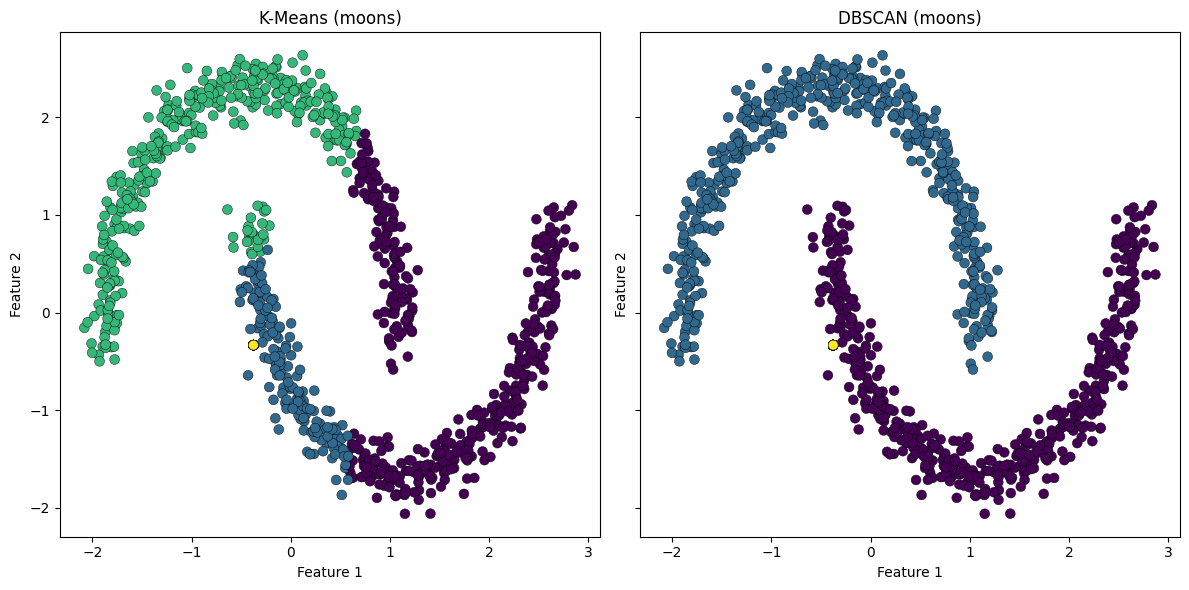

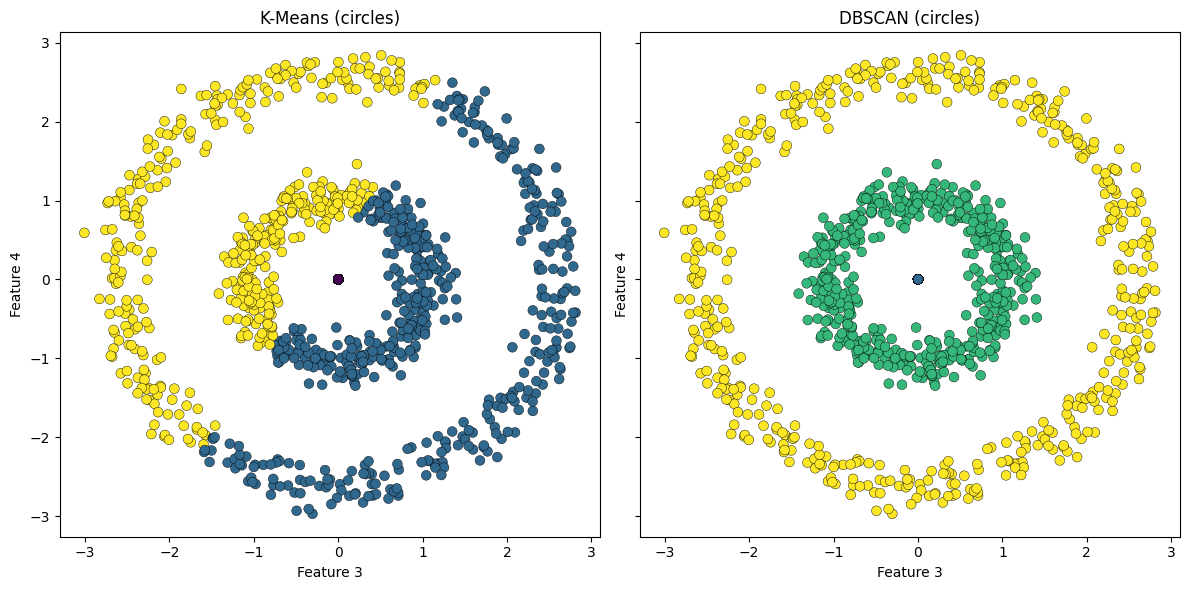

In [6]:
# Create two moons dataset and embed it to 4D
X_moons, y_moons = make_moons(n_samples=1000, noise=0.06, random_state=42)
X_moons_4d = np.c_[X_moons, np.zeros((len(X_moons), 2))]

# Create two circles dataset and embed it to 4D
X_circles, y_circles = make_circles(n_samples=1000, factor=0.4, noise=0.06, random_state=42)
X_circles_4d = np.c_[np.zeros((len(X_circles), 2)), X_circles]
y_circles += 2

# Combine all 4 clusters together
X_combined = np.vstack([X_moons_4d, X_circles_4d])
y_true = np.hstack([y_moons, y_circles])

# Scale the data for DBSCAN
X_combined_scaled = StandardScaler().fit_transform(X_combined)

# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_combined)

# DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_combined_scaled)

# NMI for K-Means and DBSCAN
nmi_kmeans = normalized_mutual_info_score(y_true, kmeans_labels)
nmi_dbscan = normalized_mutual_info_score(y_true, dbscan_labels)

# Adjusted Rand Index for K-Means and DBSCAN
adjusted_rand_index_kmeans = adjusted_rand_score(y_true, kmeans_labels)
adjusted_rand_index_dbscan = adjusted_rand_score(y_true, dbscan_labels)

# Number of clusters detected by DBSCAN
dbscan_clusters_found = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"k-Means NMI: {nmi_kmeans:.3f}, Adjusted Rand Index: {adjusted_rand_index_kmeans:.3f}")
print(f"DBSCAN  NMI: {nmi_dbscan:.3f}, Adjusted Rand Index: : {adjusted_rand_index_dbscan:.3f}, clusters found: {dbscan_clusters_found}\n")

# Visualization of moons dataset
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
ax[0].scatter(X_combined_scaled[:,0], X_combined_scaled[:,1], c=kmeans_labels, s=50, cmap="viridis", edgecolor="k", linewidth=0.3)
ax[0].set_title("K-Means (moons)")
ax[1].scatter(X_combined_scaled[:,0], X_combined_scaled[:,1], c=dbscan_labels, s=50, cmap="viridis", edgecolor="k", linewidth=0.3)
ax[1].set_title("DBSCAN (moons)")
for a in ax:
  a.set_xlabel("Feature 1")
  a.set_ylabel("Feature 2")
plt.tight_layout()
plt.show()

# Visualization of circles dataset
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
ax[0].scatter(X_combined_scaled[:,2], X_combined_scaled[:,3], c=kmeans_labels, s=50, cmap="viridis", edgecolor="k", linewidth=0.3)
ax[0].set_title("K-Means (circles)")
ax[1].scatter(X_combined_scaled[:,2], X_combined_scaled[:,3], c=dbscan_labels, s=50, cmap="viridis", edgecolor="k", linewidth=0.3)
ax[1].set_title("DBSCAN (circles)")
for a in ax:
  a.set_xlabel("Feature 3")
  a.set_ylabel("Feature 4")
plt.tight_layout()
plt.show()


##### c) Create data that has at least 10 dimensions and at least five clusters that cannot be detected correctly by **DBSCAN**. Simultaneously, they should be detected perfectly by **HDBSCAN**. Can you detect the clusters with single linkage clustering? Try it out! Explain why/why not!


NMI of DBSCAN:         0.255
NMI of HDBSCAN:        1.000
NMI of Single Linkage: 1.000



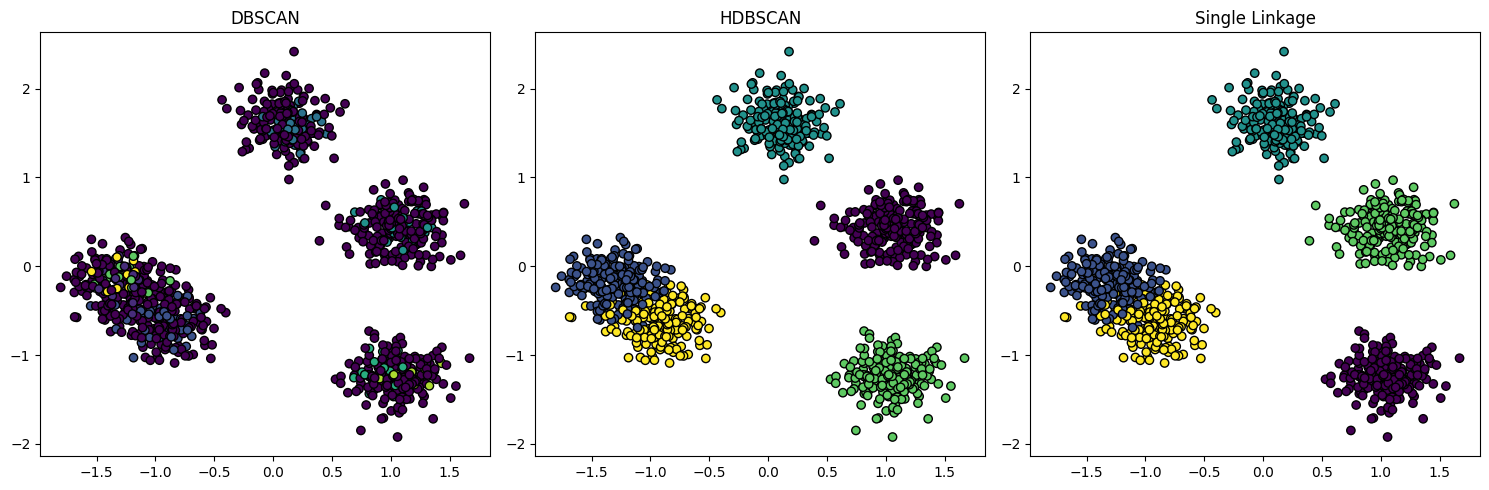

In [7]:
# Generate a sample data with 10 dimensions
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=5, n_features=10, random_state=42)

# Standardize the features
X_scaled = StandardScaler().fit_transform(X_blobs)

# Apply DBSCAN
dbscan_blobs  = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan_blobs.fit_predict(X_scaled)

# Apply HDBSCAN
hdbscan_blobs  = HDBSCAN(min_cluster_size=10)
hdbscan_labels = hdbscan_blobs.fit_predict(X_scaled)

# Apply AgglomerativeClustering (Single Linkage Clustering)
agglomerative_blobs  = AgglomerativeClustering(n_clusters=5, linkage='single', metric='euclidean')
agglomerative_labels = agglomerative_blobs.fit_predict(X_scaled)

# NMI of DBSCAN, HDBSCAN and Agglomerative
nmi_dbscan        = normalized_mutual_info_score(y_blobs, dbscan_labels)
nmi_hdbscan       = normalized_mutual_info_score(y_blobs, hdbscan_labels)
nmi_agglomerative = normalized_mutual_info_score(y_blobs, agglomerative_labels)

print(f"NMI of DBSCAN:         {nmi_dbscan:.3f}")
print(f"NMI of HDBSCAN:        {nmi_hdbscan:.3f}")
print(f"NMI of Single Linkage: {nmi_agglomerative:.3f}\n")

# Plot all 3 clusters
plt.figure(figsize=(15, 5))

# Plot DBSCAN
plt.subplot(1, 3, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 9], c=dbscan_labels, cmap='viridis', edgecolor='k')
plt.title('DBSCAN')

# Plot HDBSCAN
plt.subplot(1, 3, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 9], c=hdbscan_labels, cmap='viridis', edgecolor='k')
plt.title('HDBSCAN')

# Plot Single Linkage
plt.subplot(1, 3, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 9], c=agglomerative_labels, cmap='viridis', edgecolor='k')
plt.title('Single Linkage')

plt.tight_layout()
plt.show()

DBSCAN is perfectly suitable for indetifyling clusters of arbitary shapes amd handling noise in datasets, however it struggles with varying densities and high dimensions. One of common issues could be a choice of inappropriate epsilon parameter, as it defines the radius of the data points around. So, if epsilon is very small, it makes the algorithm label many points as noise, while a large ε can cause clusters to merge and reduce how well they're separated.

For that reason, HDBSCAN is better suited for data with varying densities and in higher dimensions, as it doesn't require a fixed epsilon.

Single linkage clustering usually doesn't handle noise very well, and in high-dimensional data, distance-based methods often struggle because of the curse of dimensionality. Still, for this dataset, single linkage actually worked perfectly — it found all the clusters just as well as HDBSCAN and did much better than DBSCAN.

##### d) Regard the following properties for all three datasets from 1-2 a, b, and c:

* For each cluster, compute the average distance to its mean.
* For each pair of clusters, compute the smallest distance between them.

Discuss the similarities and dissimilarities of the distributions.

In [8]:
# Function to compute average distance to cluster mean
def average_distance_to_mean(X, labels):
    unique_labels = np.unique(labels)
    avg_distances = {}
    for label in unique_labels:
        if label == -1:  # Ignore noise points
            continue
        cluster_points = X[labels == label]
        if len(cluster_points) > 0:
            cluster_mean = np.mean(cluster_points, axis=0)
            distances = np.linalg.norm(cluster_points - cluster_mean, axis=1)
            avg_distances[label] = np.mean(distances)

    return avg_distances

# Function to compute smallest distance between cluster pairs
def smallest_distance_between_clusters(X, labels):
    unique_labels = np.unique(labels)

    # Remove noise label
    if -1 in unique_labels:
        unique_labels = unique_labels[unique_labels != -1]

    min_distances = {}
    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            label1 = unique_labels[i]
            label2 = unique_labels[j]
            cluster1_points = X[labels == label1]
            cluster2_points = X[labels == label2]

            if len(cluster1_points) > 0 and len(cluster2_points) > 0:
                distances = euclidean_distances(cluster1_points, cluster2_points)
                min_distances[(label1, label2)] = np.min(distances)

    return min_distances

# Dataset from 1-2 a
print("-------------")
print("Dataset 1-2 a")
print("-------------")
avg_dist_a = average_distance_to_mean(X_densitybased, y_densitybased)
min_dist_a = smallest_distance_between_clusters(X_densitybased, y_densitybased)

print("Average distance to cluster mean:")
for label, dist in avg_dist_a.items():
    print(f"Cluster {label}: {dist:.3f}")

print("\nSmallest distance between cluster pairs:")
for (label1, label2), dist in min_dist_a.items():
    print(f"Clusters {label1} and {label2}: {dist:.3f}")
print('\n')



# Dataset from 1-2 b
print("-------------")
print("Dataset 1-2 b")
print("-------------")
avg_dist_b = average_distance_to_mean(X_combined, y_true)
min_dist_b = smallest_distance_between_clusters(X_combined, y_true)

print("Average distance to cluster mean:")
for label, dist in avg_dist_b.items():
    print(f"Cluster {label}: {dist:.3f}")

print("\nSmallest distance between cluster pairs:")
for (label1, label2), dist in min_dist_b.items():
    print(f"Clusters {label1} and {label2}: {dist:.3f}")
print('\n')



# Dataset from 1-2 c
print("-------------")
print("Dataset 1-2 c")
print("-------------")
avg_dist_c = average_distance_to_mean(X_blobs, y_blobs)
min_dist_c = smallest_distance_between_clusters(X_blobs, y_blobs)

print("Average distance to cluster mean:")
for label, dist in avg_dist_c.items():
    print(f"Cluster {label}: {dist:.3f}")

print("\nSmallest distance between cluster pairs:")
for (label1, label2), dist in min_dist_c.items():
    print(f"Clusters {label1} and {label2}: {dist:.3f}")

-------------
Dataset 1-2 a
-------------
Average distance to cluster mean:
Cluster 0: 3.709
Cluster 1: 1.293
Cluster 2: 1.252

Smallest distance between cluster pairs:
Clusters 0 and 1: 0.011
Clusters 0 and 2: 0.016
Clusters 1 and 2: 4.661


-------------
Dataset 1-2 b
-------------
Average distance to cluster mean:
Cluster 0: 0.731
Cluster 1: 0.728
Cluster 2: 0.997
Cluster 3: 0.405

Smallest distance between cluster pairs:
Clusters 0 and 1: 0.261
Clusters 0 and 2: 1.184
Clusters 0 and 3: 0.870
Clusters 1 and 2: 0.837
Clusters 1 and 3: 0.236
Clusters 2 and 3: 0.288


-------------
Dataset 1-2 c
-------------
Average distance to cluster mean:
Cluster 0: 3.043
Cluster 1: 3.094
Cluster 2: 3.078
Cluster 3: 3.186
Cluster 4: 3.029

Smallest distance between cluster pairs:
Clusters 0 and 1: 11.823
Clusters 0 and 2: 23.457
Clusters 0 and 3: 29.879
Clusters 0 and 4: 20.575
Clusters 1 and 2: 22.716
Clusters 1 and 3: 31.591
Clusters 1 and 4: 20.600
Clusters 2 and 3: 15.356
Clusters 2 and 4: 13.5

### Exercise 1-3: Evaluation

##### a\) For this subtask, use the output of sklearn's DBSCAN directly as an input for sklearn's NMI computation. Create a data set with 3 clusters and find hyperparameters for DBSCAN s.t. the standard sklearn NMI implementation results in 1.0 even though DBSCAN only detects 2 clusters (and noise).

NMI score: 1.000
Number of clusters detected by DBSCAN (excluding noise): 2



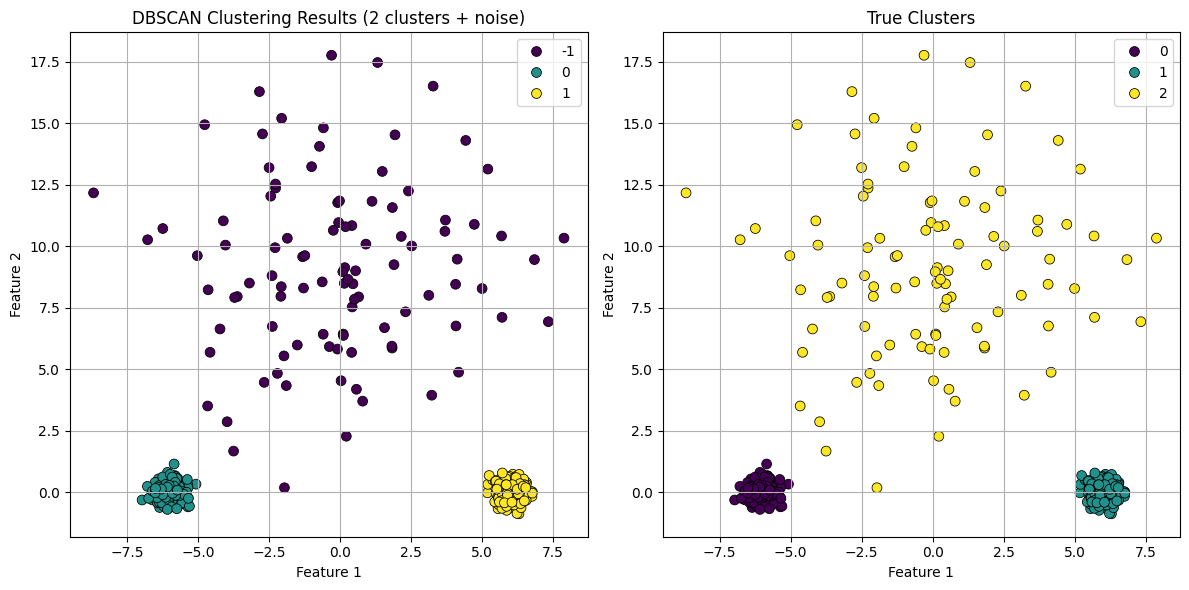

In [9]:
# Create a dataset with 3 clusters
X_13a, y_13a = make_blobs(n_samples=[300, 300, 100], centers=[[-6, 0], [6, 0], [0, 9]], cluster_std=[0.30, 0.30, 3.40], random_state=42)

# Apply DBSCAN with parameters that result in 2 clusters and noise
dbscan_13a = DBSCAN(eps=0.85, min_samples=15)
dbscan_labels_13a = dbscan_13a.fit_predict(X_13a)

# Compute NMI
nmi_13a = normalized_mutual_info_score(y_13a, dbscan_labels_13a)

# Number of unique labels found by DBSCAN (excluding noise)
num_detected_clusters = len(set(dbscan_labels_13a)) - (1 if -1 in dbscan_labels_13a else 0)

print(f"NMI score: {nmi_13a:.3f}")
print(f"Number of clusters detected by DBSCAN (excluding noise): {num_detected_clusters}\n")

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for DBSCAN results
sb.scatterplot(x=X_13a[:, 0], y=X_13a[:, 1], hue=dbscan_labels_13a, palette='viridis', ax=axes[0], s=50, edgecolor='k', legend='full')
axes[0].set_title('DBSCAN Clustering Results (2 clusters + noise)')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True)

# Plot for True Clusters
sb.scatterplot(x=X_13a[:, 0], y=X_13a[:, 1], hue=y_13a, palette='viridis', ax=axes[1], s=50, edgecolor='k', legend='full')
axes[1].set_title('True Clusters')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True)

plt.tight_layout()
plt.show()

##### b) Create a data set and two clusterings that show that NMI and ARI contradict each other. The clustering C1 should be found by k-Means and the other clustering C2 by DBSCAN. Contradicting means that

* (i) NMI(C1) > NMI(C2)
* (ii) ARI(C1) < ARI(C2)

C1 = K-Means:   NMI=0.556, ARI=0.281
C2 = DBSCAN :   NMI=0.493, ARI=0.529
Contradiction Check:  NMI(C1) > NMI(C2) and ARI(C1) < ARI(C2)  =>  True 



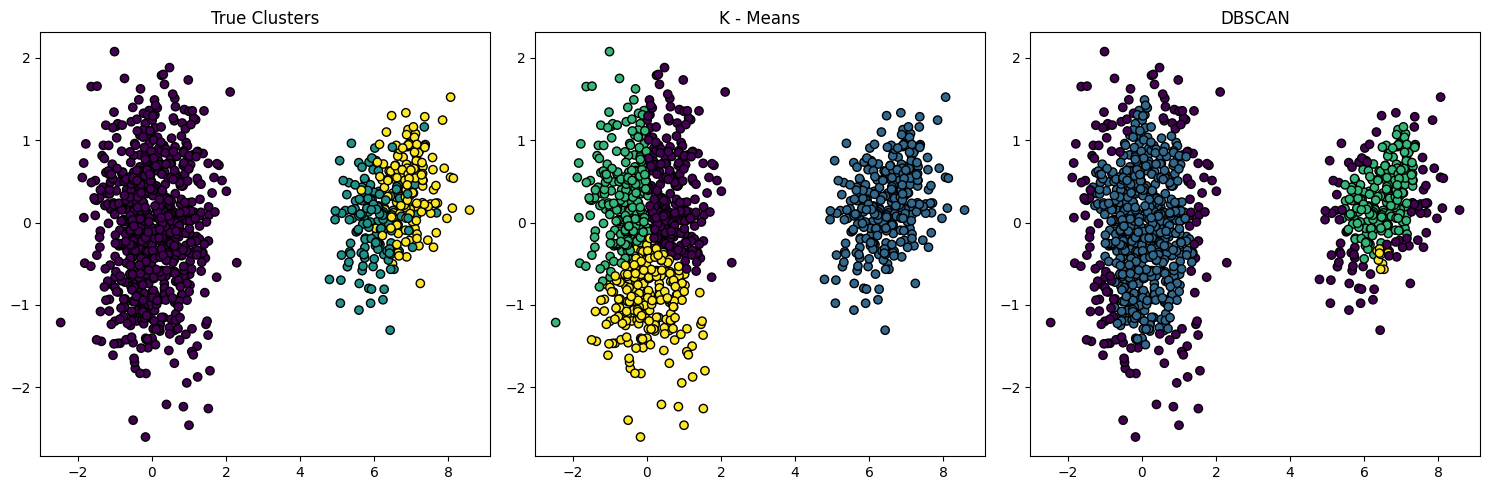

In [10]:
# Generate dataset
X_13b, y_13b = make_blobs(n_samples=[700, 150, 150], centers=[[0, 0], [6.0, 0.0], [7.0, 0.5]], cluster_std=[0.8, 0.45, 0.45], random_state=7)

# Apply K-Means
kmeans_13b = KMeans(n_clusters=4, random_state=7)
kmeans_labels_13b = kmeans_13b.fit_predict(X_13b)

# Compute NMI and ARI for K-Means
nmi_c1 = normalized_mutual_info_score(y_13b, kmeans_labels_13b)
ari_c1 = adjusted_rand_score(y_13b, kmeans_labels_13b)

# Apply DBSCAN
dbscan_13b = DBSCAN(eps=0.2, min_samples=10)
dbscan_labels_13b = dbscan_13b.fit_predict(X_13b)

# Compute NMI and ARI for DBSCAN
nmi_c2 = normalized_mutual_info_score(y_13b, dbscan_labels_13b)
ari_c2 = adjusted_rand_score(y_13b, dbscan_labels_13b)

print(f"C1 = K-Means:   NMI={nmi_c1:.3f}, ARI={ari_c1:.3f}")
print(f"C2 = DBSCAN :   NMI={nmi_c2:.3f}, ARI={ari_c2:.3f}")

# Check the contradiction conditions
print("Contradiction Check:  NMI(C1) > NMI(C2) and ARI(C1) < ARI(C2)  => ", (nmi_c1 > nmi_c2) and (ari_c1 < ari_c2), '\n')

# Plot all 3 clusters
plt.figure(figsize=(15, 5))

# Plot true clusters
plt.subplot(1, 3, 1)
plt.scatter(X_13b[:, 0], X_13b[:, 1], c=y_13b, cmap='viridis', edgecolor='k')
plt.title('True Clusters')

# Plot K-Means
plt.subplot(1, 3, 2)
plt.scatter(X_13b[:, 0], X_13b[:, 1], c=kmeans_labels_13b, cmap='viridis', edgecolor='k')
plt.title('K - Means')

# Plot DBSCAN
plt.subplot(1, 3, 3)
plt.scatter(X_13b[:, 0], X_13b[:, 1], c=dbscan_labels_13b, cmap='viridis', edgecolor='k')
plt.title('DBSCAN')

plt.tight_layout()
plt.show()

##### c) Implement the Silhouette Coefficient with the Manhattan distance instead of the Euclidean distance. To which of the following data transformations is the Manhattan version not invariant (but the Euclidean is)? Explain in your own words or give a small example.
* (i) Translation (shifting all points by a constant vector)
* (ii) Uniform scaling (multiplying all coordinates by a constant)
* (iii) Rotation of the coordinate system
* (iv) Reflection across an axis

In [11]:
# Function to calculate Silhouette Coefficient with a given distance metric
def silhouette_coefficient_with_metric(X, labels, metric='euclidean'):
    return np.mean(silhouette_samples(X, labels, metric=metric))

# Generate dataset
X_13c, y_13c = make_blobs(n_samples=500, centers=3, random_state=42)

# Apply KMeans
kmeans_13c = KMeans(n_clusters=3, random_state=42)
kmeans_labels_13c = kmeans_13c.fit_predict(X_13c)

# Calculate Silhouette Coefficient with Euclidean distance
silhouette_euclidean = silhouette_coefficient_with_metric(X_13c, kmeans_labels_13c, metric='euclidean')
print(f"Average Silhouette Coefficient (Euclidean): {silhouette_euclidean:.3f}")

# Calculate Silhouette Coefficient with Manhattan distance
silhouette_manhattan = silhouette_coefficient_with_metric(X_13c, kmeans_labels_13c, metric='manhattan')
print(f"Average Silhouette Coefficient (Manhattan): {silhouette_manhattan:.3f}")

Average Silhouette Coefficient (Euclidean): 0.844
Average Silhouette Coefficient (Manhattan): 0.858


From all these 4, only the rotation of the coordinate system is not invariant for Manhattan version, but the Euclidian is. Suppose, we have two points $P_1(1,0)$ and $P_2(0,1)$. Now, let's calculate Manhattan and Euclidian distances:

* **Manhattan:** $d(x,y) = \sum_{i=1}^{n} |x_i - y_i| = |(0-1)| + |(1-0)| = 2$
* **Euclidian:** $d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} = \sqrt{(1-0)^2 + (0-1)^2} = \sqrt{2}=1.414$

For example, we want to rotate points by 45°. It can be done by applying Rotation matrix:
$$
\begin{pmatrix}
1\\
0
\end{pmatrix}
\rightarrow
\begin{pmatrix}
\cos \alpha\\
\sin \alpha
\end{pmatrix}
~~~~~~
\begin{pmatrix}
0\\
1
\end{pmatrix}
\rightarrow
\begin{pmatrix}
-\sin \alpha\\
\cos \alpha
\end{pmatrix}
~~~
=>
~~~
R_{\alpha}=
\begin{pmatrix}
\cos \alpha & -\sin \alpha\\
\sin \alpha & \cos \alpha
\end{pmatrix}
$$

$$
P'_1=R_{\alpha}*P_1 =
\begin{pmatrix}
\cos \frac{\pi}{4} & - \sin \frac{\pi}{4} \\
\sin \frac{\pi}{4} & \cos \frac{\pi}{4}
\end{pmatrix} *
\begin{pmatrix}
1\\
0
\end{pmatrix} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1\\
1
\end{pmatrix}
$$

$$
P'_2=R_{\alpha}*P_2 =
\begin{pmatrix}
\cos \frac{\pi}{4} & - \sin \frac{\pi}{4} \\
\sin \frac{\pi}{4} & \cos \frac{\pi}{4}
\end{pmatrix} *
\begin{pmatrix}
0\\
1
\end{pmatrix} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
-1\\
1
\end{pmatrix}
$$


Now, after applying the rotation, let's compute the distances again:
* **Manhattan:** $d'(x',y') = \sum_{i=1}^{n} |x_i' - y_i'| = \frac{1}{\sqrt{2}}(|(1-(-1))| + |(1-1)|) = \sqrt{2}=1.414$
* **Euclidian:** $d'(x',y') = \sqrt{\sum_{i=1}^{n}(x_i' - y_i')^2} = \sqrt{\frac{1}{2}((1-(-1))^2 + (1-1)^2)} = \sqrt{2}=1.414$

As we can see, both distances equal 1.414 after rotation. It means the Manhattan distance depends on the orientation of the coordinate system, hence it's not rotation-invariant, while Euclidian distance is, cause its value remains the same before and after rotation.

##### Examples why others are not invariant:

(i) Translation (shifting all points by a constant vector)

Again the same points: $P_1(1,0)$ and $P_2(0,1)$. We now from previous example, that Manhattan distace is 2 and Euclidian is 1.414. Now, let's shift the points by (5,5). So, now $P_1(6,5)$ and $P_2(5,6) =>$
* **Manhattan:** $d(x,y) = \sum_{i=1}^{n} |x_i - y_i| = |(6-5)| + |(5-6)| = 2$
* **Euclidian:** $d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} = \sqrt{(6-5)^2 + (5-6)^2} = \sqrt{2}=1.414$

$=> $ Distances remained unchanged after shifting $ => $ Both are invariant

(ii) Uniform scaling (multiplying all coordinates by a constant)

Same Points: $P_1(1,0), P_2(0,1)$. We multiply both points by 5 $=> P_1(5, 0), P_2(0, 5)$.
* **Manhattan:** $d(x,y) = \sum_{i=1}^{n} |x_i - y_i| = |(5-0)| + |(0-5)| = 10$
* **Euclidian:** $d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} = \sqrt{(5-0)^2 + (0-5)^2} = 5 \sqrt{2}$

The distances may not be the same before and after, but when we take a closer look, the distances both increased by the same factor (×5). Although their absolute values changed, the **ratio** used in the silhouette coefficient $(\frac{b(i)-a(i)}{max(a(i),b(i))})$ remains the same because a(i) and b(i) are scaled equally.   Therefore, scaling is invariant for both Manhattan and Euclidian versions.

(iv) Reflection across an axis

Let's take for this example new points, e.g. $P_1(2,4)$ and $P_2(-4, 6)$. Now we reflect the points in x-axis $=> P_1(2,-4), P_2(-4, -6)$.

Before reflection:
* **Manhattan:** $d(x,y) = \sum_{i=1}^{n} |x_i - y_i| = |(2-(-4))| + |(4-6)| = 8$
* **Euclidian:** $d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} = \sqrt{(2-(-4))^2 + (4-6)^2} = \sqrt{40}=2\sqrt{10}$

After reflection:
* **Manhattan:** $d(x,y) = \sum_{i=1}^{n} |x_i - y_i| = |(2-(-4))| + |(-4-(-6))| = 8$
* **Euclidian:** $d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} = \sqrt{(2-(-4))^2 + (-4-(-6))^2} = \sqrt{40}=2\sqrt{10}$

$=> $ Distances remained unchanged after reflection $ => $ Both are invariant
